### MNIST CNN
![title](https://ml4a.github.io/images/figures/mnist-input.png)

<video controls src="data/Neural Network 3D Simulation.mp4" />

In [49]:
%matplotlib inline
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.backend.tensorflow_backend import set_session

In [50]:
# Mendefinisikan Fungsi
def set_gpu_mem_alloc(mem_use):
    avail  = 4041
    percent = mem_use / avail
    config = tf.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = percent
    config.gpu_options.visible_device_list = "0"
    set_session(tf.Session(config=config))

set_gpu_mem_alloc(2000)

In [51]:
batch_size = 128
num_classes = 10
epochs = 12

In [52]:
# input image dimensions
img_rows, img_cols = 28, 28

In [53]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

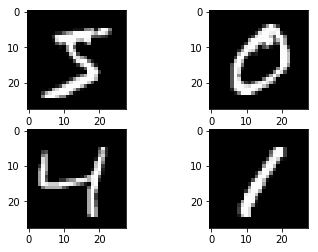

In [54]:
# apa sih isinya
f,ax = plt.subplots(2,2)
ax[0][0].imshow(x_train[0], cmap='gray')
ax[0][1].imshow(x_train[1], cmap='gray')
ax[1][0].imshow(x_train[2], cmap='gray')
ax[1][1].imshow(x_train[3], cmap='gray')

In [55]:
# Reshape struktur datanya
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [56]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [57]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [58]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [59]:
ksize = (3,3)
psize = (2,2)

model = Sequential()
model.add(Conv2D(32, kernel_size=ksize, activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=psize))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


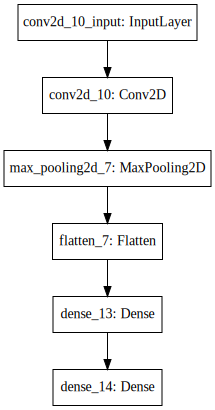

In [61]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [63]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [64]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 102us/step - loss: 0.2676 - acc: 0.9188 - val_loss: 0.1151 - val_acc: 0.9616
Epoch 2/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0763 - acc: 0.9775 - val_loss: 0.0751 - val_acc: 0.9756
Epoch 3/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0502 - acc: 0.9852 - val_loss: 0.0570 - val_acc: 0.9812
Epoch 4/12
60000/60000 [==============================] - 6s 92us/step - loss: 0.0376 - acc: 0.9889 - val_loss: 0.0415 - val_acc: 0.9851
Epoch 5/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0291 - acc: 0.9914 - val_loss: 0.0400 - val_acc: 0.9863
Epoch 6/12
60000/60000 [==============================] - 6s 93us/step - loss: 0.0226 - acc: 0.9936 - val_loss: 0.0412 - val_acc: 0.9847
Epoch 7/12
60000/60000 [==============================] - 6s 100us/step - loss: 0.0179 - acc: 0.9949 - val_loss: 0.0410 - val_a

In [65]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0411370140263
Test accuracy: 0.9874


In [33]:
model.save('saved/mnist_cnn.h5')

In [66]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [67]:
predict = model.predict(x_test, batch_size=128)

Prediction :  0


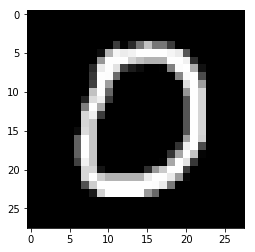

In [68]:
idx = 10
print('Prediction : ', np.argmax(predict[idx]))
plt.imshow(test_x[idx], cmap='gray')